# AGDC Version 2 Requirements till 30 June 2016 10/12/2015

## Summary

A great deal of work has been done by AGDC partners to outline the key requirements and technical approach for the next version of the AGDC (Version 2). For example, the previous Technical Working Group held a workshop that resulted in a draft Preliminary Design Report that has subsequently been translated to the AGDC wiki ( http://datacube.org.au ). Similarly, prototype functionality has been built to test and verify key concepts for a range of components including the netCDF-4 based Storage Units that are managed under NCIfs NERDIP data management, publishing and general access to data protocols; a Generalised Data Framework (GDF) to access the multidimensional Storage Units; and the AGDC Analytic Engine adding support for interactive Exploratory Data Analysis (EDA).

The following requirements for Version 2 have been mainly based off this thinking and documentation. It is important to note that these requirements are for the current development
effort running through till June 30, 2016. They are designed to guide and define the next step in the development of the AGDC, not as the final destination.


Approved Requirements for AGDC Version 2

These requirements were formally approved by the AGDC Programme Board at its meeting on 10
December, 2015.

Patterns of Use:
AGDC Version 2 will support the following patterns of use.

## 1. Routine national scale product generation. Specifically, Version 2 will include national collections of:
    
 Water Observations from Space.

 Intertidal Characterisation.

 Landsat Fractional Cover.

 Pixel Quality.

 NDVI.

Landsat Surface reflectance statistical summaries:

    Seasonal medians; and
    
    Most-up-to-date observation.
    
In some cases, these collections may be virtual, i.e. they are not pre-computed but rather
computed as they are needed.


## 2. A user should be able to interact with these collections through a web browser including:#


Clicking on a pixel and displaying a time series (i.e., pixel drill).



### Spatio-temporal (statistical) summaries that would allow users to easily answer questions such as:
    
    How frequently was water observed over catchment y during time period x; and

    What was the surface reflectance for area x at time y?

## 3. Earth Observation (EO) scientists and allied domain specialists will be able to undertake exploratory data analysis. In general this would mean a user will be able to easily retrieve, investigate, visualise, develop algorithms, test, iterate, visualise results and interpret them in the context of other spatio-temporal datasets.

 A key demonstration of this capability will be the availability of functions and data
structures to enable Landsat/MODIS blending.

### Input data
The AGDC will use the following data collections:
 Landsat: TM, ETM+ and OLI/TIRS.
 MODIS: Collection 6 MOD09 (granule) and MOD43 (sinusoidal tiles) that will provide variables
necessary for the Landsat-MODIS blending algorithm.

In [1]:
import datacube.api
dc = datacube.api.API()
products = dc.list_products()
for product in products:
    print product['description']

LS5 FC 25 metre, 100km tile, Albers projection
LS5 NBAR 25 metre, 100km tile, Albers projection
LS5 PQ 25 metre, 100km tile, Albers projection


It will also include the SRTM 3 second DSM and 1 and 3 second DEMs.

In [2]:
dc.list_storage_type_names()

[u'ls5_fc_albers', u'ls5_nbar_albers', u'ls5_pq_albers']

At a minimum, the Australian implementation of the AGDC will cover all of continental Australia plus a
one tile buffer and the Great Barrier Reef. However, the Boards preference would be for the Version
2 to also cover all Commonwealth Marine Reserves.

In [3]:
import folium
from IPython.display import display
import geopandas
from shapely.geometry import mapping
%matplotlib inline

In [4]:
cells = dc.list_cells()

In [5]:
shapes = []
from shapely.geometry import Polygon
for cell in cells:
    llxy = [i * 100000 for i in cell]
    lrxy = (llxy[0] + 100000, llxy[1])
    ulxy = (llxy[0], llxy[1] + 100000)
    urxy = (lrxy[0], ulxy[1])
    shapes.append(Polygon([(ulxy), (urxy), (lrxy), (llxy)]))

In [6]:
gdf = geopandas.GeoDataFrame(crs={'init': 'epsg:3577', 'no_defs': True}, geometry=shapes)
gdf_project = gdf.to_crs(epsg=4326)
geojson = gdf_project.to_json()
bounds = gdf_project.total_bounds
shp = mapping(Polygon([(bounds[0], bounds[-1]),
                       (bounds[2], bounds[-1]),
                       (bounds[2], bounds[1]),
                       (bounds[0], bounds[1])]))

In [7]:
style_function = lambda x: {'fillColor': '#000000' if x['type'] == 'Polygon' else '#00ff00'}
mapa = folium.Map(location=[-30,150], zoom_start=4)
polygons = folium.features.GeoJson(geojson, style_function=style_function)
poly = folium.features.GeoJson(shp, style_function=style_function)
mapa.add_children(polygons)
#mapa.add_children(poly)
display(mapa)

All data collections that are included in the Australian implementation of the AGDC will:
 Have a CC BY Attribution 3.0 or CC BY Attribution 4.0 license. 

In [8]:
import datacube.api
dc = datacube.api.API()
print dc.list_products()[0]['global_attributes']['license']

Creative Commons Attribution 4.0 International CC BY 4.0


The use of a collection with a
different licence will require approval of the AGDC Programme Board; and
 Be in netCDF 4 format and will comply with relevant CF conventions;.

In [9]:
from __future__ import print_function
import argparse
import sys
from compliance_checker.runner import ComplianceChecker, CheckSuite
from compliance_checker import __version__

ds_loc = '/g/data/rs0/tiles/EPSG3577/LS8_OLI_TIRS_NBART_timeslice/2013/-15_-36/LS8_OLI_TIRS_NBART_3577_-15_-36_20130329020501814265.nc'

cs = CheckSuite()
ds = cs.load_dataset(ds_loc)
cs.load_all_available_checkers()
score_groups = cs.run(ds, 'cf')

return_value, errors = ComplianceChecker.run_checker('/g/data/rs0/tiles/EPSG3577/LS8_OLI_TIRS_NBART_timeslice/2013/-15_-36/LS8_OLI_TIRS_NBART_3577_-15_-36_20130329020501814265.nc', ['cf','coards'], 1, 'normal', '-','text')



--------------------------------------------------------------------------------
                     The dataset scored 67 out of 67 points                     
                              during the cf check                               
--------------------------------------------------------------------------------
                           Verbose Scoring Breakdown:                            

                                 High Priority                                  
--------------------------------------------------------------------------------
    Name                            :Priority: Score
§2.2 Valid netCDF data types           :3:    12/12
§2.3 Legal variable names              :3:    12/12
§2.4 Unique dimensions                 :3:    12/12
§2.6.1 Global Attribute Conventions in :3:     1/1
§2.6.2 Convention Attributes           :3:     2/2
    §2.6.2 Title/history global attrib :3:       2/2
        history                         :3:         1/1
        t

## Output Products
By June 30, 2016 the Australian implementation of the AGDC will ensure that the products being
produced are supported by and hosted on the RDS.

## Technical Requirements
In line with the use-case patterns outlined above, Version 2 will support:
 Data-fusion and analysis across heterogeneous gridded data collections from different
domains.

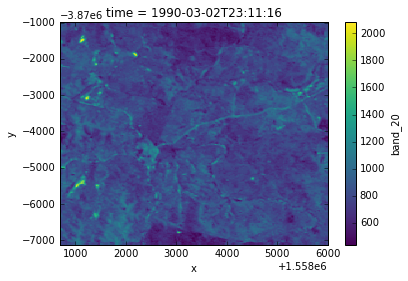

In [23]:
from datacube.api import geo_xarray
nbar = dc.get_dataset(product='NBAR', x=(149.1,149.15),y=(-34.5,-34.55))
src_crs = nbar['crs'].attrs['spatial_ref']
n1 = nbar['band_20'].isel(time=0)
n1.plot()

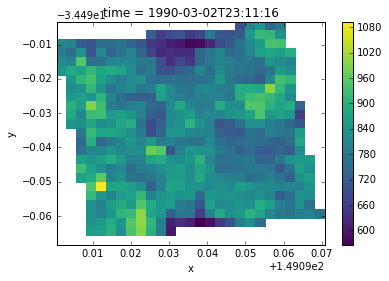

In [13]:
geographic = geo_xarray.reproject(n1, src_crs, 'EPSG:4326', 
                          set_nan=True, resolution=0.0025,
                          resampling=geo_xarray.Resampling.bilinear)
geographic.plot()

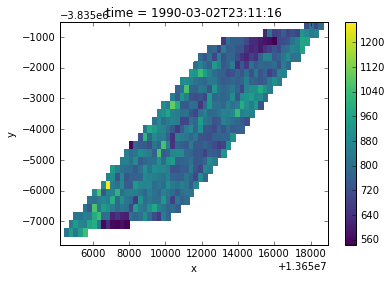

In [18]:
modis_crs = 'PROJCS["Sinusoidal",GEOGCS["GCS_Undefined",DATUM["Undefined",SPHEROID["User_Defined_Spheroid",6371007.181,0.0]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]],PROJECTION["Sinusoidal"],PARAMETER["False_Easting",0.0],PARAMETER["False_Northing",0.0],PARAMETER["Central_Meridian",0.0],UNIT["Meter",1.0]]'
sinusoidal = geo_xarray.reproject(n1, src_crs, modis_crs, resolution=250, resampling=geo_xarray.Resampling.cubic, set_nan=True)
sinusoidal.plot()

Tuneable configuration, at ingest, of multidimensional files (eg. chunking, compression type,
dimension depth).

## A data retrieval mechanism that provides the ability to:


Obtain seamless subsets of data across storage unit boundaries;


In [ ]:
#plot cell boundary onto spatio temporal subset



Filter data based on observation attribute (for example, pixel quality);

In [20]:
#pixel quality example

from datacube.api import API, describe_flags, make_mask, list_flag_names
import xarray as xr
dc = API()
CELL = (19, -29)
pqa = dc.get_dataset_by_cell(CELL, product='pqa', platform='LANDSAT_8')
pqa
print(describe_flags(pqa))
print(list_flag_names(pqa))

#Define good pixel
GA_GOOD_PIXEL = {name: False for name in ('band_5_saturated',
 'band_6_1_saturated',
 'cloud_shadow_acca',
 'cloud_fmask',
 'band_3_saturated',
 'band_1_saturated',
 'band_4_saturated',
 'band_2_saturated',
 'cloud_acca',
 'band_6_2_saturated',
 'cloud_shadow_fmask',
 'band_7_saturated')}
GA_GOOD_PIXEL.update(dict(contiguity=True, land_obs=True))

# Make a mask to get only good pixels
good_pixel_mask = make_mask(pqa, **GA_GOOD_PIXEL)
nbar = dc.get_dataset_by_cell(CELL, variables=('band_1', 'band_2', 'band_3'), product='nbar', platform='LANDSAT_8')
nbar_good_pixels = nbar.where(good_pixel_mask)['band_1']

ImportError: cannot import name describe_flags

Define the spatio-temporal range of interest independent of data storage unit; and define the specific sensor or combination of sensor data to be analysed.

Define the specific sensor or combination of sensor data to be analysed.

Define the specific sensor or combination of sensor data to be analysed.

In [28]:
query = {
    'product': 'NBAR',
    'platform': 'LANDSAT_5',
    'variables': ['band_30', 'band_40'],
    'dimensions': {
        'x' : {
            'range': (148.5, 149.5),
            'array_range': (0, 1),
        },
        'y' : {
            'range': (-34.8, -35.8),
            'array_range': (0, 1),
        },
        'time': {
            'range': ((1990, 4, 1), (2020, 5, 1))
        }
    }
}
data = dc.get_data(query)
data.items()

[('dimensions', [u'time', u'y', u'x']),
 ('arrays', {u'band_30': <xarray.DataArray u'band_30' (time: 196, y: 1, x: 1)>
   dask.array<getitem..., shape=(196, 1, 1), dtype=int16, chunksize=(1, 1, 1)>
   Coordinates:
     * time     (time) datetime64[ns] 1990-04-03T23:10:42 1990-05-05T23:10:28 ...
     * y        (y) float64 -3.897e+06
     * x        (x) float64 1.486e+06,
   u'band_40': <xarray.DataArray u'band_40' (time: 196, y: 1, x: 1)>
   dask.array<getitem..., shape=(196, 1, 1), dtype=int16, chunksize=(1, 1, 1)>
   Coordinates:
     * time     (time) datetime64[ns] 1990-04-03T23:10:42 1990-05-05T23:10:28 ...
     * y        (y) float64 -3.897e+06
     * x        (x) float64 1.486e+06}),
 ('element_sizes', [numpy.timedelta64(1072065760204081,'ns'), 0, 0]),
 ('indices', {u'time': array(['1990-04-04T09:10:42.000000000+1000',
          '1990-05-06T09:10:28.000000000+1000',
          '1990-06-05T09:22:26.000000000+1000',
          '1990-06-05T09:22:50.000000000+1000',
          '1990-06

The API will provide a simplified conceptual model for data query and analysis based
on an n-dimensional array abstraction;

During EDA, lazy evaluation of calculations so only those results that are in use are
computed; and

In [30]:
import mpld3; mpld3.enable_notebook()

from datetime import datetime
from datacube.analytics.analytics_engine import AnalyticsEngine
from datacube.execution.execution_engine import ExecutionEngine
from datacube.analytics.utils.analytics_utils import plot

ImportError: No module named mpld3

Support for calculations on arrays that are larger than core memory.

Continental scale product generation will be based off the continental workflows from the
current ADGC v1 API, however it will be modified to use the version 2 data retrieval
mechanism.

The ability to manage results of calculations as a temporary/private data cube for further
analysis.

Web based delivery of products through WMS, WCS, CS/W, OpenDAP services.

Basic provenance that records information about an analysis result/product such as what
datasets, software version, ancillary data and algorithm was used to produce the product.
Wherever possible, Version 2 will adopt and adapt existing software, services and standards.

## Other Requirements
### The Project Plan will be supported by:
 A transition plan and timetable for moving AGDC production from Version 1 to Version 2 of
the AGDC (including controlled updates to data collections that are already accessible via
RDS);

A software release and management plan;

A plan for improving the data management of the collections in the RDS Landsat (rs0) and
WOfs (fk4) Projects, such as establishing data layout, appropriate access controls (including
read/write permissions) and alignment to existing organisational data libraries);
 Reformatting of all data in projects rs0 (Landsat) and fk4 (WOfS) that are currently stored in
GeoTIFF into netCDF4-CF;

An AGDC database API which can provide a base for further AGDC developments and that can
accommodate updates in the internal structure of netCDF4-CF;

Upgrading all documentation (including Data Management Plans, Product Specifications, etc.)
and ensuring that any Metadata is compliant with the requirements of the Australian
Government Spatial Data Policies and Directives, the Australian National Data Service and
data.gov.au; and

 




Benchmarks and Quality Assurance tests to validate the quality of the access that is required
by the agreed use-cases.